<a href="https://colab.research.google.com/github/Marwat07/RoadSignDetection/blob/main/Roadsign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Oct 17 09:28:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   66C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.7 MB/s eta 0:00:00


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.216 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.4/112.6 GB disk)


In [4]:
%pwd

'/content'

In [5]:
!mkdir RoadSignDetection

In [6]:
import os
os.chdir('/content/RoadSignDetection')

In [7]:
%pwd

'/content/RoadSignDetection'

In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wWAUY8pWDG26NNvfbXn9")
project = rf.workspace("selfdriving-car-qtywx").project("self-driving-cars-lfjou")
version = project.version(6)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 130.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Self-Driving-Cars-6 in yolov8:: 100%|██████████| 9950/9950 [00:00<00:00, 10300.91it/s]


In [9]:
os.chdir("/content/RoadSignDetection/Self-Driving-Cars-6")

In [10]:
%pwd

'/content/RoadSignDetection/Self-Driving-Cars-6'

In [12]:
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=10 imgsz=640 batch=16

Ultralytics 8.3.216 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tr

In [14]:
!ls "/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train2/"

args.yaml			 labels.jpg		val_batch0_pred.jpg
BoxF1_curve.png			 results.csv		val_batch1_labels.jpg
BoxP_curve.png			 results.png		val_batch1_pred.jpg
BoxPR_curve.png			 train_batch0.jpg	val_batch2_labels.jpg
BoxR_curve.png			 train_batch1.jpg	val_batch2_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg	weights
confusion_matrix.png		 val_batch0_labels.jpg


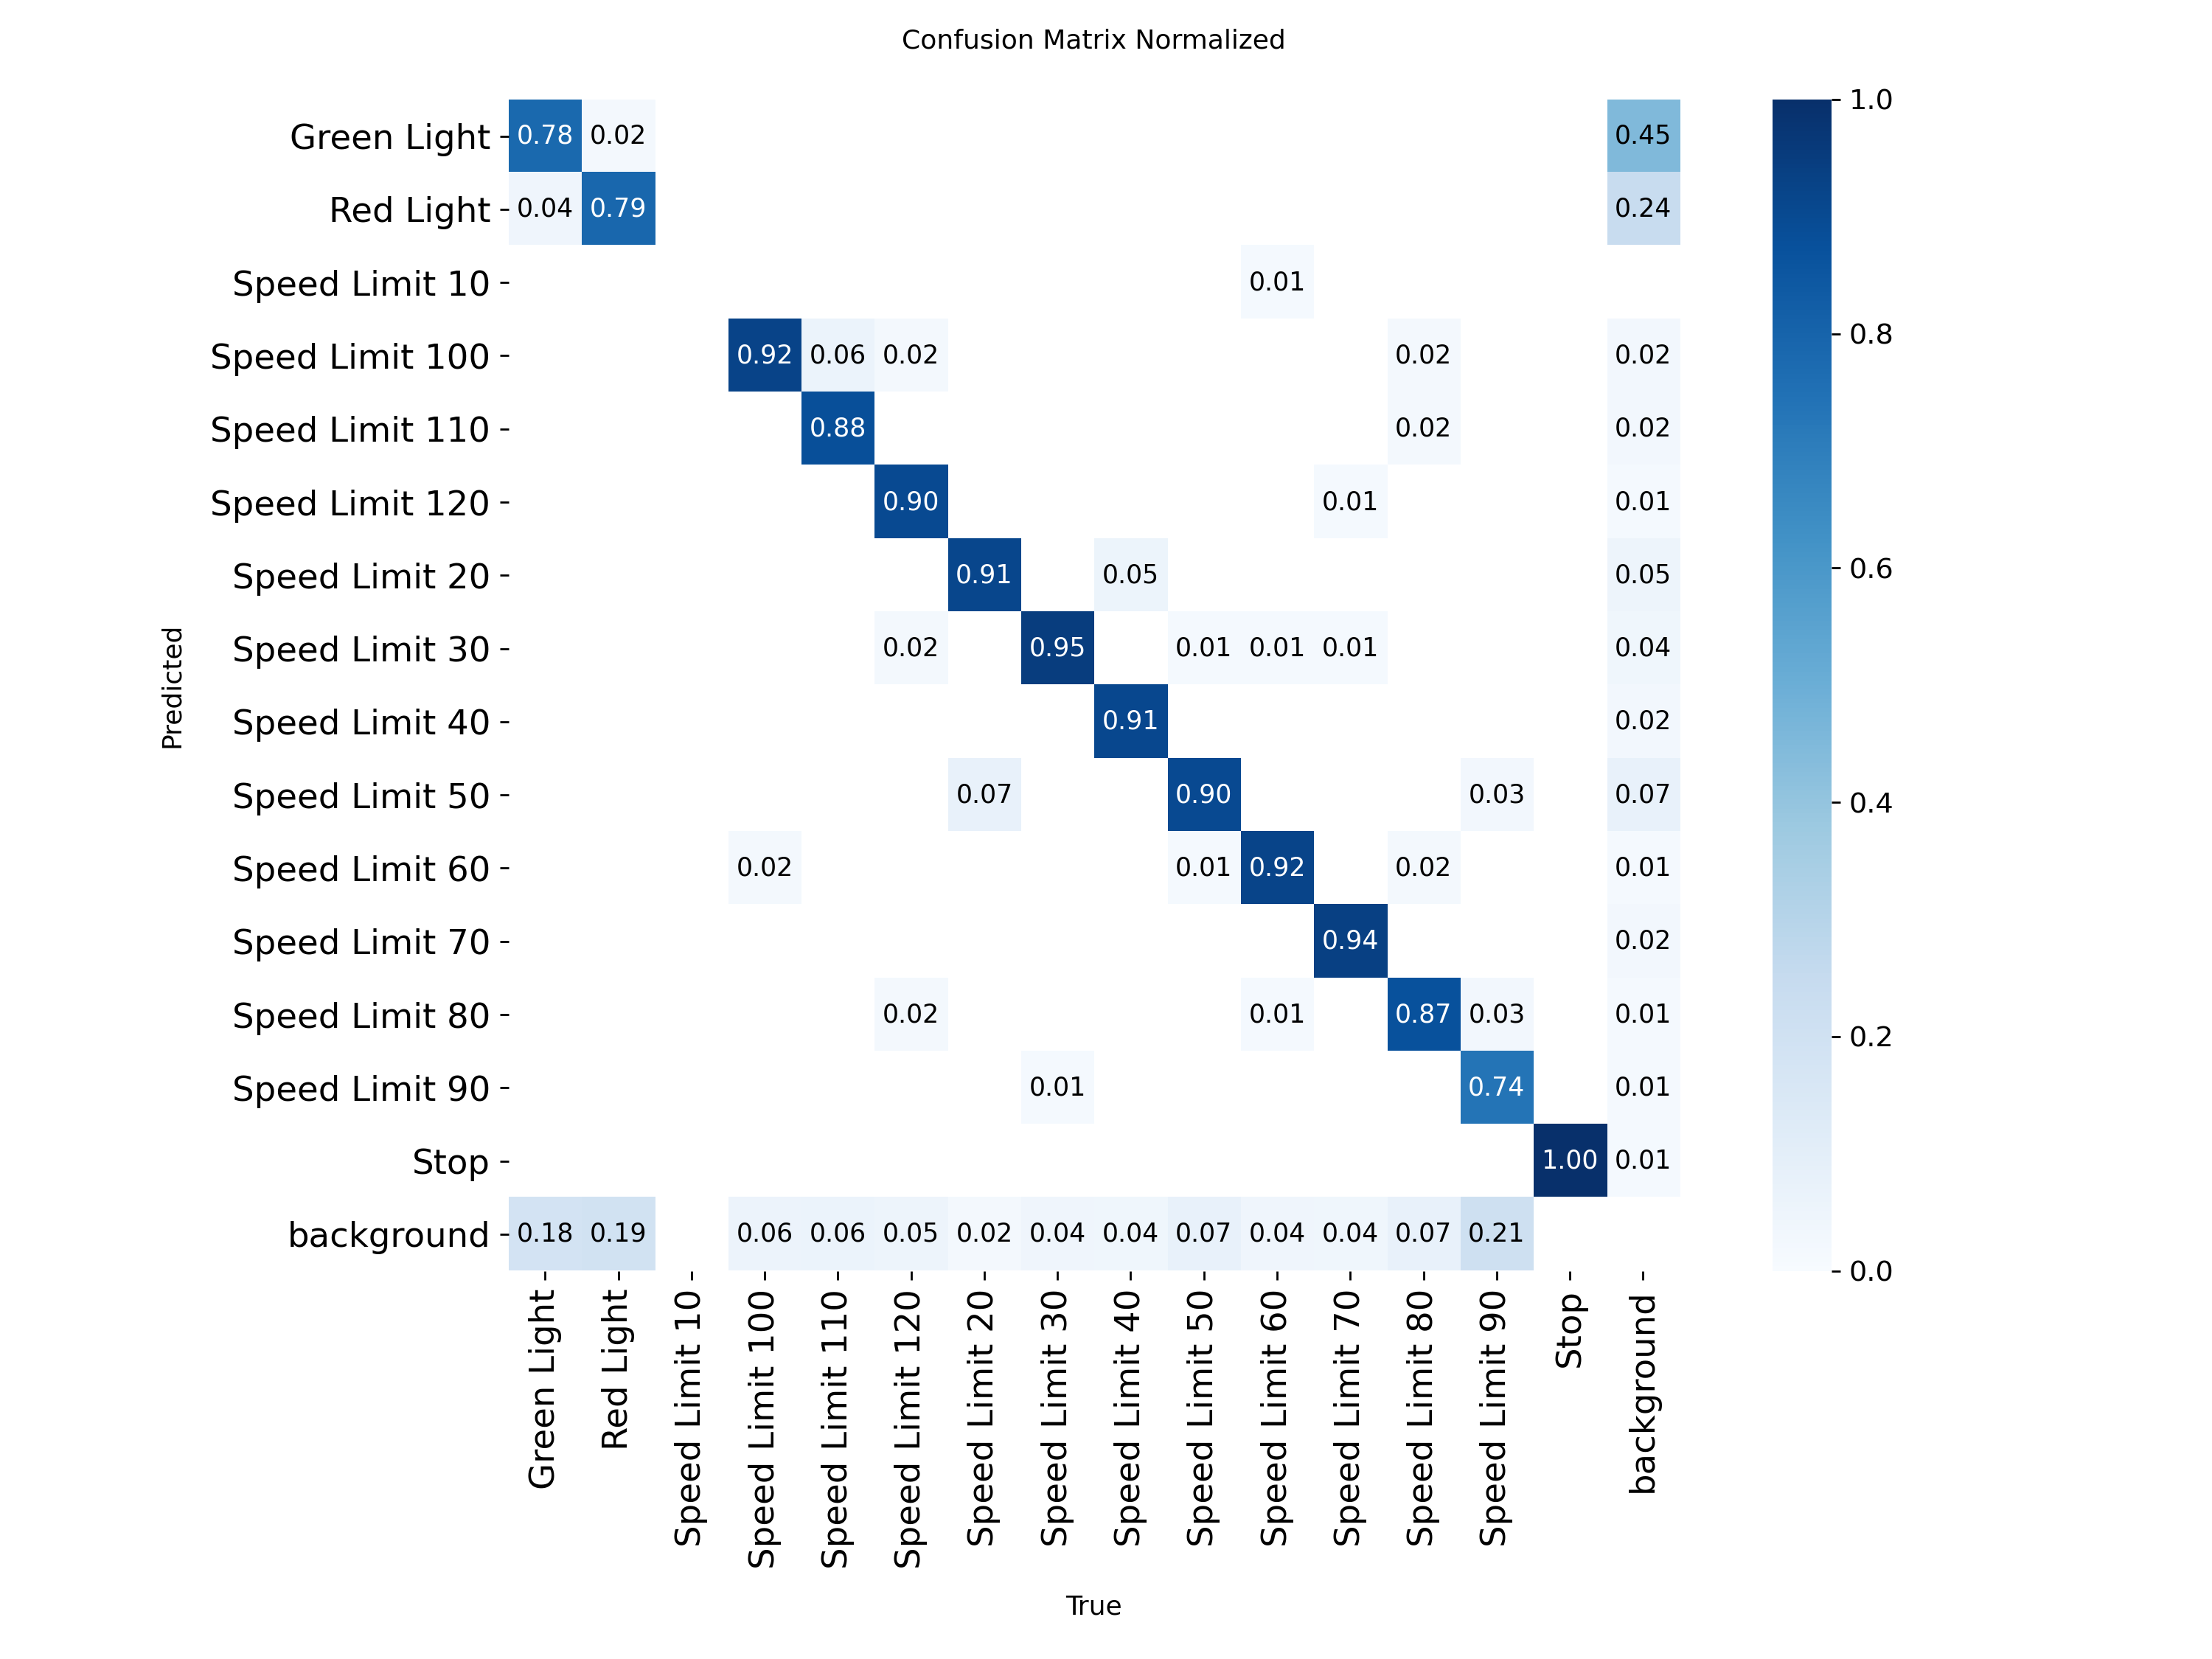

In [15]:
resultimage = "/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train2/"
from IPython.display import Image
Image(filename=resultimage + '/confusion_matrix_normalized.png', )

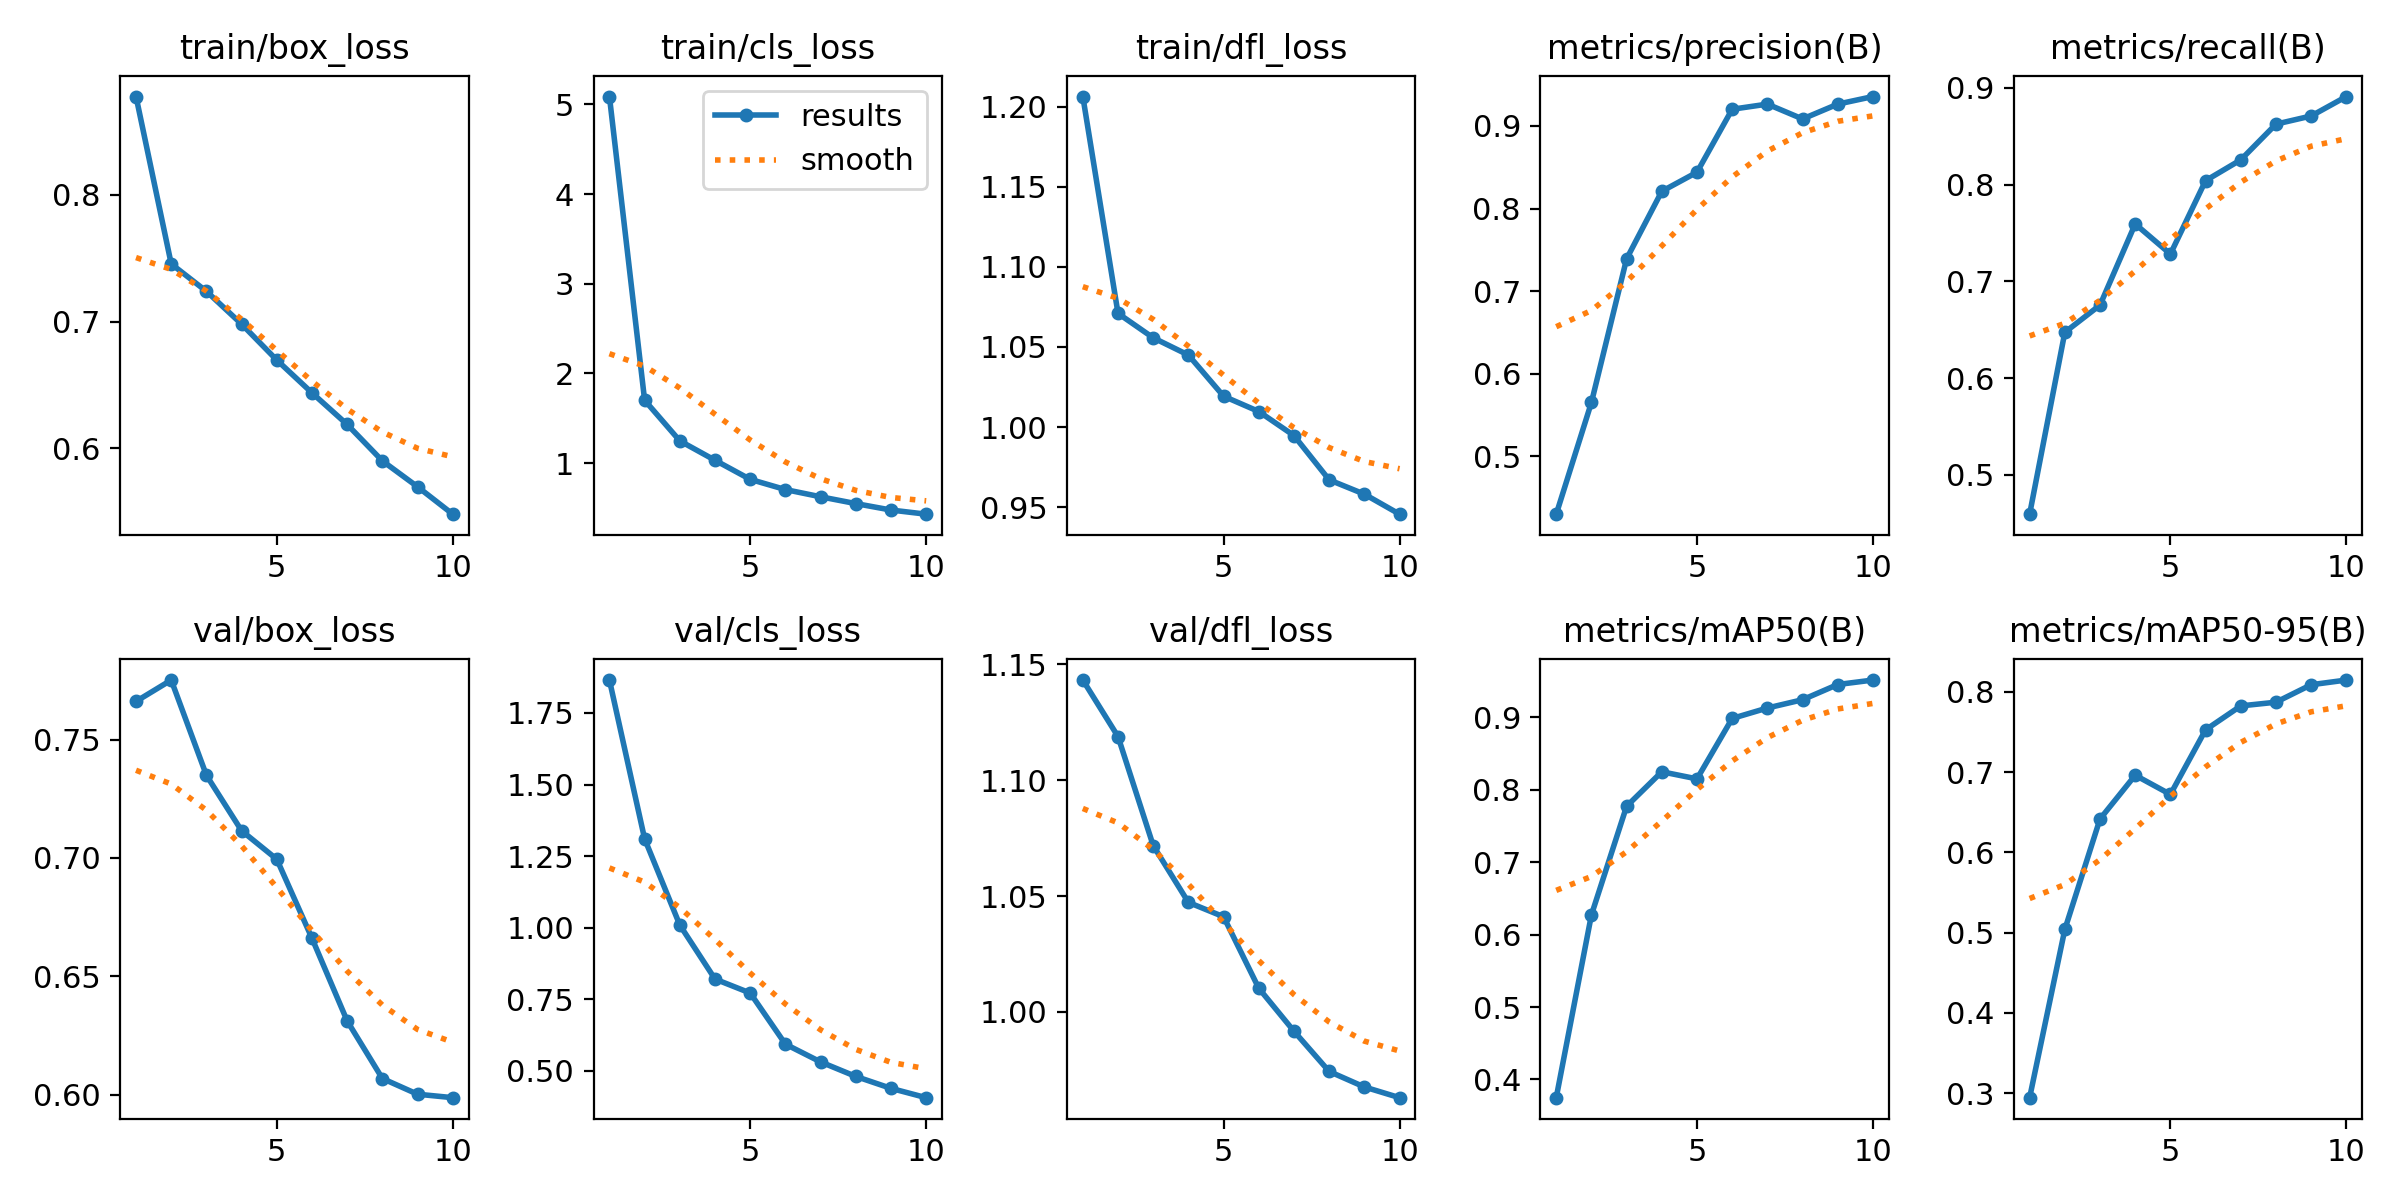

In [16]:
Image(filename=resultimage + '/results.png', )

In [20]:
import pandas as pd
df= pd.read_csv(resultimage + '/results.csv')
print(df.tail(2))

   epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
8      9  638.476         0.56984         0.47756         0.95809   
9     10  708.929         0.54827         0.43139         0.94560   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
8               0.92641            0.87094           0.94502   
9               0.93557            0.89102           0.95118   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
8              0.80878       0.60015       0.43935       0.96766  0.000109   
9              0.81461       0.59869       0.40683       0.96305  0.000057   

     lr/pg1    lr/pg2  
8  0.000109  0.000109  
9  0.000057  0.000057  


In [21]:
%pwd


'/content/RoadSignDetection/Self-Driving-Cars-6'

In [22]:
os.chdir("/content")

In [23]:
%pwd

'/content'

In [24]:
!mkdir ManualTestingData

In [26]:
%pwd
os.chdir("/content/ManualTestingData")

In [27]:
%pwd

'/content/ManualTestingData'

In [28]:
weightsPath = "/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train2/weights/"
!yolo task=detect mode=predict model={weightsPath + 'best.pt'} conf =.25 source='d1.mp4'

Ultralytics 8.3.216 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,131,389 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (frame 1/281) /content/ManualTestingData/d1.mp4: 384x640 1 Stop, 73.4ms
video 1/1 (frame 2/281) /content/ManualTestingData/d1.mp4: 384x640 1 Stop, 11.1ms
video 1/1 (frame 3/281) /content/ManualTestingData/d1.mp4: 384x640 (no detections), 16.4ms
video 1/1 (frame 4/281) /content/ManualTestingData/d1.mp4: 384x640 (no detections), 21.7ms
video 1/1 (frame 5/281) /content/ManualTestingData/d1.mp4: 384x640 (no detections), 11.3ms
video 1/1 (frame 6/281) /content/ManualTestingData/d1.mp4: 384x640 1 Stop, 11.2ms
video 1/1 (frame 7/281) /content/ManualTestingData/d1.mp4: 384x640 1 Stop, 11.6ms
video 1/1 (frame 8/281) /content/ManualTestingData/d1.mp4: 384x640 1 Stop, 14.2ms
video 1/1 (frame 9/281) /content/ManualTestingData/d1.mp4: 384x640 1 Stop, 10.7ms
video 1/1 (frame 10/281) /content/ManualTestingData/d1.mp4: 384x640 1

Download video


In [32]:
from google.colab import files
files.download('/content/ManualTestingData/runs/detect/predict/d1.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download Model like best.pt

In [1]:
from google.colab import files
files.download('/content/RoadSignDetection')

FileNotFoundError: Cannot find file: /content/RoadSignDetection

In [ ]:
%pwd